 Question to Answer: Can we predict survivability of patients with pancreatic cancer?

In [1]:
import pandas as pd
df = pd.read_csv("data/pancreatic_cancer_prediction_sample.csv")

df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null  int64 
 13  D

We want to analyze the data for patients in each respective stage

In [3]:
df["Stage_at_Diagnosis"].value_counts()

Stage_at_Diagnosis
Stage IV     19922
Stage III    14968
Stage II     10173
Stage I       4937
Name: count, dtype: int64

Now that we have seperate the data into each respective stage, we can perform a more detailed analysis.

- Goal: To predict the survival rate for each statge given the symptoms given in the dataset. 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Smoking_History'}>,
        <Axes: title={'center': 'Obesity'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Chronic_Pancreatitis'}>,
        <Axes: title={'center': 'Family_History'}>,
        <Axes: title={'center': 'Hereditary_Condition'}>,
        <Axes: title={'center': 'Jaundice'}>],
       [<Axes: title={'center': 'Abdominal_Discomfort'}>,
        <Axes: title={'center': 'Back_Pain'}>,
        <Axes: title={'center': 'Weight_Loss'}>,
        <Axes: title={'center': 'Development_of_Type2_Diabetes'}>],
       [<Axes: title={'center': 'Survival_Time_Months'}>,
        <Axes: title={'center': 'Survival_Status'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>, <Axes: >]],
      dtype=object)

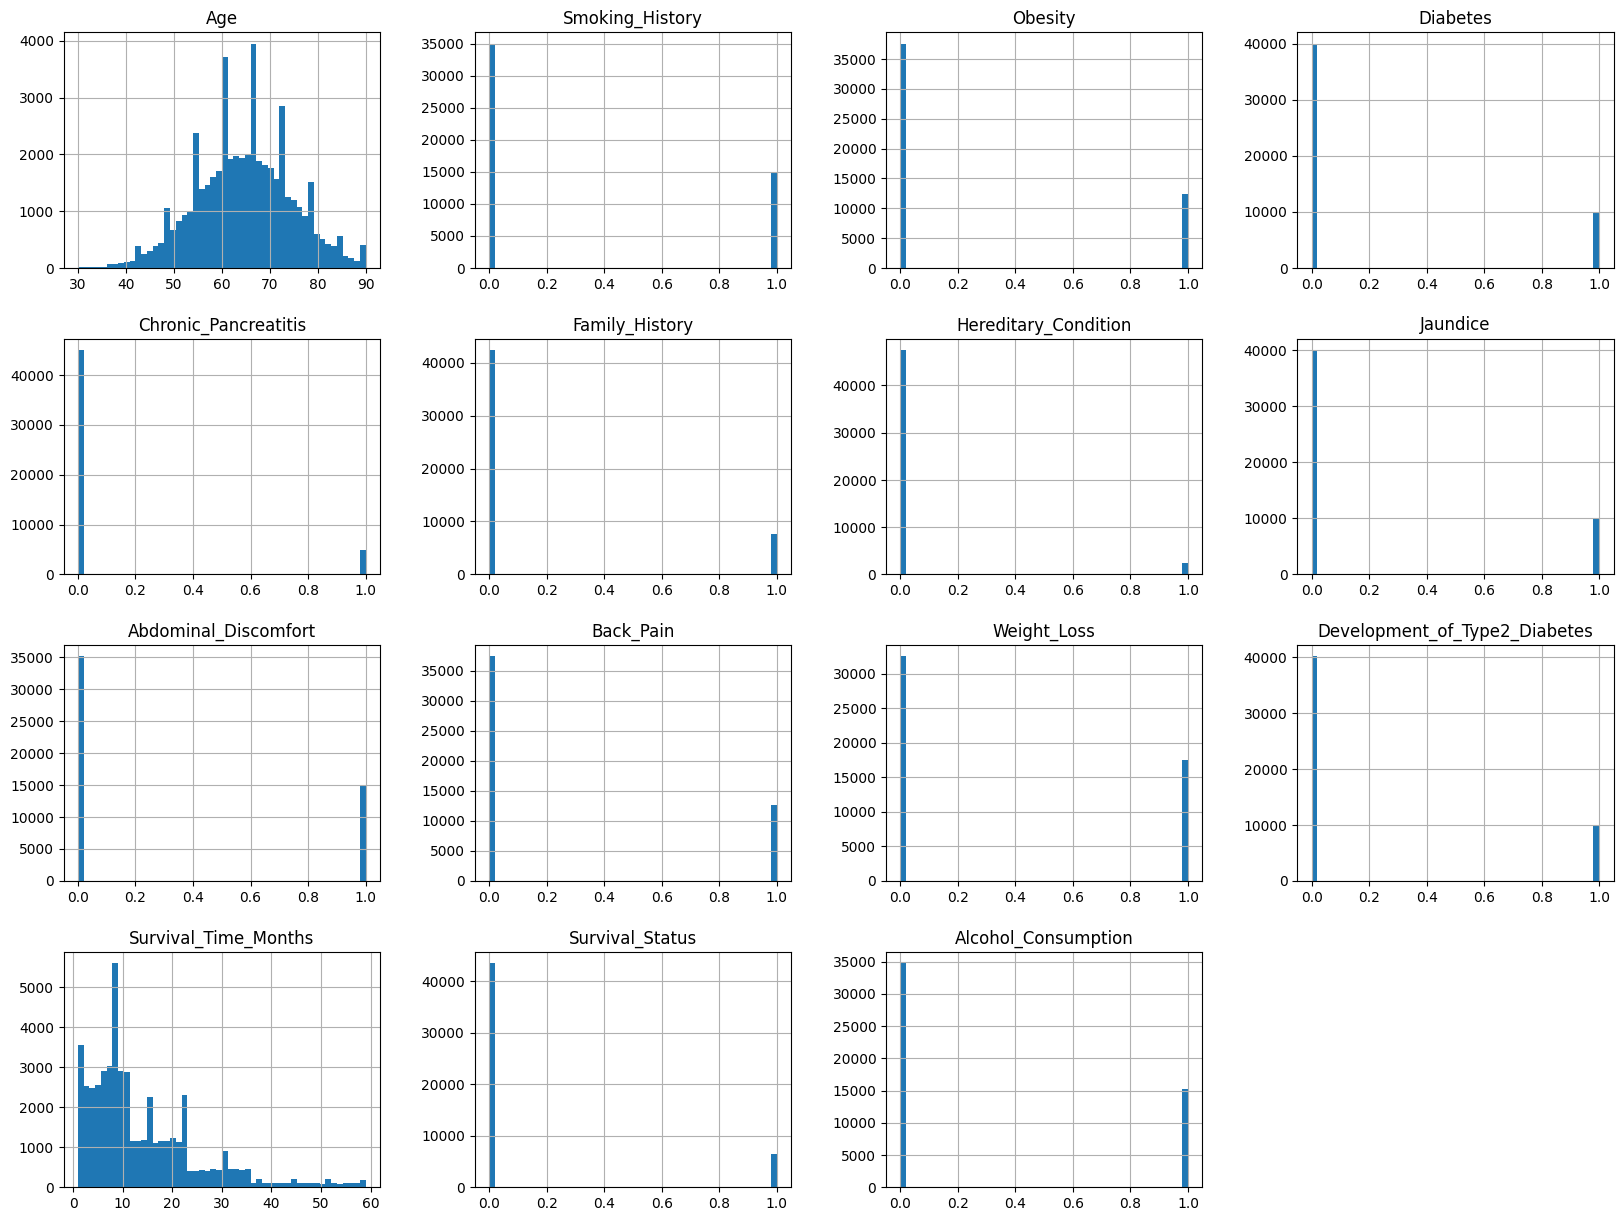

In [4]:
df.hist(bins=50, figsize=(20,15))

Looking at the plots above, we see that the data points to look out for are:

- Age
- Smoking_History
- Abdominal_Discomfort
- Weight_Loss
- Alcohol_Consumption

The rest of the data points seem not as influencial. Since the vast majority of cases in this dataset do not survive, we can make such an assumption.

Lets just split the training and test sets before we do anything to the data.

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
df["Age"].value_counts(ascending=True)

Age
31       7
32       9
33      14
30      15
35      23
      ... 
64    1936
67    1949
63    1965
65    1985
66    2003
Name: count, Length: 61, dtype: int64

<Axes: >

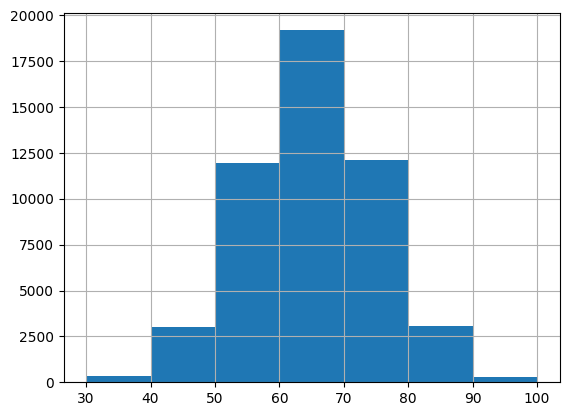

In [7]:
#Age distribution within the cases
df["Age"].hist(bins=[30, 40, 50, 60, 70, 80, 90, 100])

To simplify the Age category, we redine the category to Age_Range and group the data by a smaller set of age ranges rather than exact age.

<Axes: xlabel='Age_Range'>

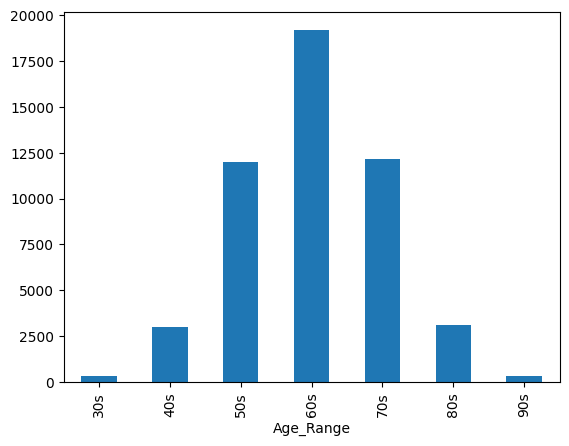

In [8]:
df["Age_Range"] = pd.cut(df["Age"], bins=[30, 40, 50, 60, 70, 80, 90, 100],
                labels=["30s", "40s", "50s", "60s", "70s", "80s", "90s"],
                right=False)

df["Age_Range"].value_counts()[0:7].sort_index().plot.bar()

As we can see, this plot is easier to read compared to the previous bar plot above.

We can now implement stratified sampling based on these age range categories.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Age_Range"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

strat_test_set["Age_Range"].value_counts().sort_index() / len(strat_test_set)

Age_Range
30s    0.0064
40s    0.0600
50s    0.2394
60s    0.3837
70s    0.2427
80s    0.0617
90s    0.0061
Name: count, dtype: float64

In [13]:
strat_train_set["Age_Range"].value_counts().sort_index() / len(strat_train_set)

Age_Range
30s    0.006450
40s    0.060050
50s    0.239350
60s    0.383725
70s    0.242675
80s    0.061650
90s    0.006100
Name: count, dtype: float64

Roughly the same distribution, as expected.

In [ ]:
# Remove the Age_Range attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Age_Range", axis=1, inplace=True)

Lets continue and generate some visualizations of the data. Before we do that, we need to encode all the categorical column entries in the dataset.

In [21]:
copy_df = strat_train_set.copy()

copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 22834 to 35816
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Country                        40000 non-null  object  
 1   Age                            40000 non-null  int64   
 2   Gender                         40000 non-null  object  
 3   Smoking_History                40000 non-null  int64   
 4   Obesity                        40000 non-null  int64   
 5   Diabetes                       40000 non-null  int64   
 6   Chronic_Pancreatitis           40000 non-null  int64   
 7   Family_History                 40000 non-null  int64   
 8   Hereditary_Condition           40000 non-null  int64   
 9   Jaundice                       40000 non-null  int64   
 10  Abdominal_Discomfort           40000 non-null  int64   
 11  Back_Pain                      40000 non-null  int64   
 12  Weight_Loss                    40

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

copy_df_cat = copy_df[["Gender"]]


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 40000 stored elements and shape (40000, 2)>